This notebook uses R to plot profiling statistics for a 3D organoid profiling pipeline. 
It visualizes the time taken and memory usage for processing image-based profiles across different sub-image sets.
Each point on these plots represents a channel-compartment-image-set combination, allowing for an analysis of the performance of the profiling process.

```r

In [1]:
list_of_packages <- c("ggplot2", "dplyr", "tidyr", "arrow", "ggbreak")
for (package in list_of_packages) {
    suppressPackageStartupMessages(
        suppressWarnings(
            library(
                package,
                character.only = TRUE,
                quietly = TRUE,
                warn.conflicts = FALSE
            )
        )
    )
}
# Get the current working directory and find Git root
find_git_root <- function() {
    # Get current working directory
    cwd <- getwd()

    # Check if current directory has .git
    if (dir.exists(file.path(cwd, ".git"))) {
        return(cwd)
    }

    # If not, search parent directories
    current_path <- cwd
    while (dirname(current_path) != current_path) {  # While not at root
        parent_path <- dirname(current_path)
        if (dir.exists(file.path(parent_path, ".git"))) {
            return(parent_path)
        }
        current_path <- parent_path
    }

    # If no Git root found, stop with error
    stop("No Git root directory found.")
}

# Find the Git root directory
root_dir <- find_git_root()
cat("Git root directory:", root_dir, "\n")

Git root directory: /home/lippincm/Documents/NF1_3D_organoid_profiling_pipeline 


In [2]:
bandicoot_path <- normalizePath(
    file.path("~", "mnt", "bandicoot","NF1_organoid_data"),
    mustWork = FALSE
)
if (!dir.exists(bandicoot_path)) {
    profile_base_dir <- file.path(
        root_dir
    )
} else {
    profile_base_dir <- file.path(
        bandicoot_path
    )
}
profile_base_dir

[1] "/home/lippincm/mnt/bandicoot/NF1_organoid_data"

In [3]:
# get the profiling stats and load into a dataframe
profiling_path <- file.path(
    profile_base_dir,
    "data/all_patient_profiles/all_patient_featurization_stats.parquet"
)
profiling_stats_df <- arrow::read_parquet(profiling_path)
head(profiling_stats_df)
figures_path <- file.path(
    root_dir,
    "4.processing_image_based_profiles/figures/"
)
if (!dir.exists(figures_path)) {
    dir.create(figures_path, recursive = TRUE)
}

start_time,end_time,start_mem,end_mem,time_taken,mem_usage,gpu,well_fov,patient_id,feature_type,channel,compartment,time_taken_minutes,mem_usage_GB
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1764020541,1764022522,158.6406,3285.305,1981.57372,3126.664,CPU,C10-1,NF0014_T1,Granularity,AGP,Cell,33.0262286,3.053383
1764020734,1764020769,187.3242,1751.273,34.68970,1563.949,CPU,C10-1,NF0014_T1,Intensity,AGP,Cell,0.5781616,1.527294
1764020857,1764020958,138.1133,1680.852,101.07793,1542.738,CPU,C10-1,NF0014_T1,Texture,AGP,Cell,1.6846321,1.506580
1764020557,1764023224,160.1914,3285.629,2667.11762,3125.438,CPU,C10-1,NF0014_T1,Granularity,AGP,Cytoplasm,44.4519604,3.052185
1764020752,1764020788,187.7109,1748.738,35.70793,1561.027,CPU,C10-1,NF0014_T1,Intensity,AGP,Cytoplasm,0.5951322,1.524441
1764020862,1764020942,135.9727,1678.605,79.35266,1542.633,CPU,C10-1,NF0014_T1,Texture,AGP,Cytoplasm,1.3225443,1.506477


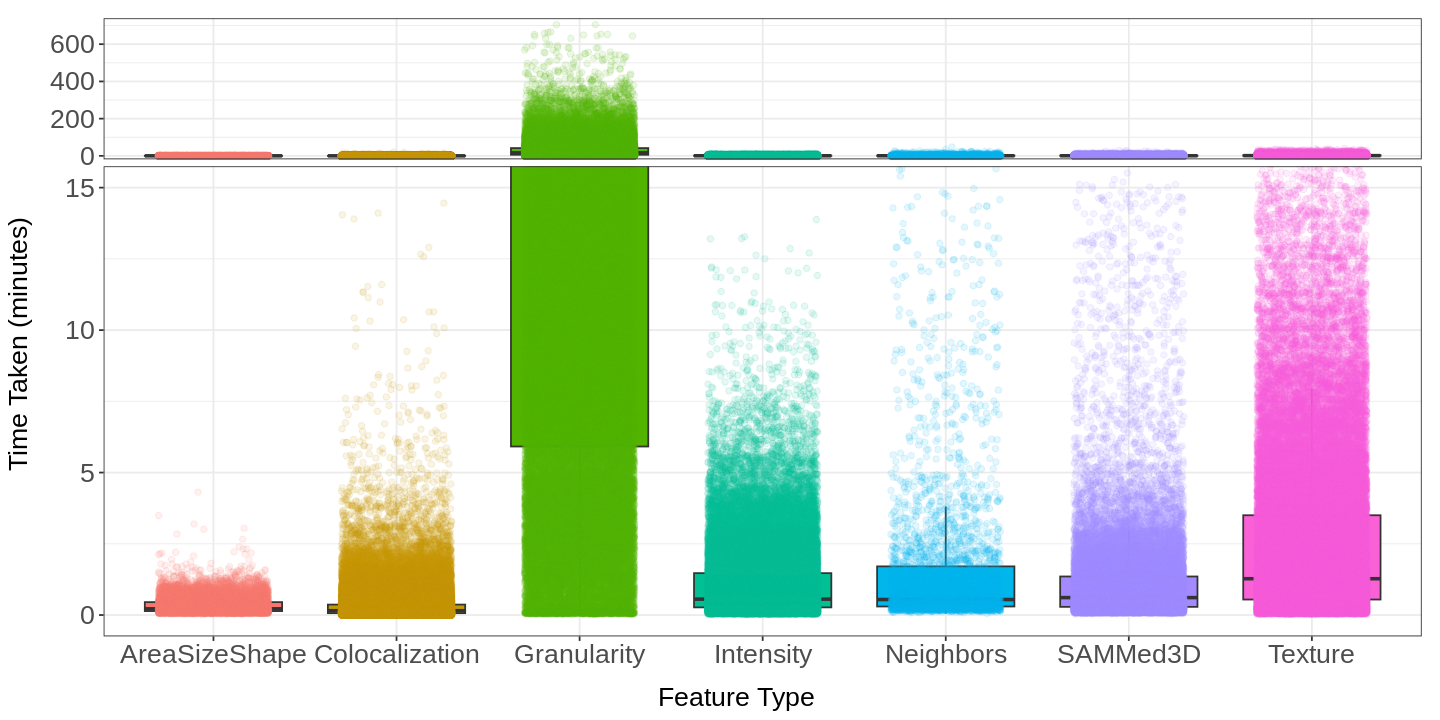

In [4]:
width <- 12
height <- 6
options(repr.plot.width = width, repr.plot.height = height)
# plot the time taken for each sub-image set
# where a sub-image set is a channel-compartment-image-set combination
time_plot <- (
    ggplot(
        profiling_stats_df,
        aes(
            x = feature_type,
            y = time_taken_minutes,
            fill = feature_type
        )  
    )
    + geom_boxplot(outlier.shape = NA)
    + geom_jitter(
        aes(color = feature_type),
        position = position_jitterdodge(dodge.width = 0.1, jitter.width = 0.6),
        alpha = 0.1
    )
    + theme_bw()
    + theme(
        axis.text.x = element_text(size = 16),
        axis.text.y = element_text(size = 16),
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16),
        legend.position = "none",
    )
    + labs(
        x = "Feature Type",
        y = "Time Taken (minutes)",
    )
)
# add a break in the y-axis to highlight the outliers
time_plot <- time_plot + scale_y_break(c(15, 16),scales = 0.3, space = 0.05)
# save the plot to the figures directory
ggsave(
    filename = file.path(figures_path, "profiling_time_per_feature_type.png"),
    plot = time_plot,
    width = width,
    height = height,
    dpi = 300
)
time_plot

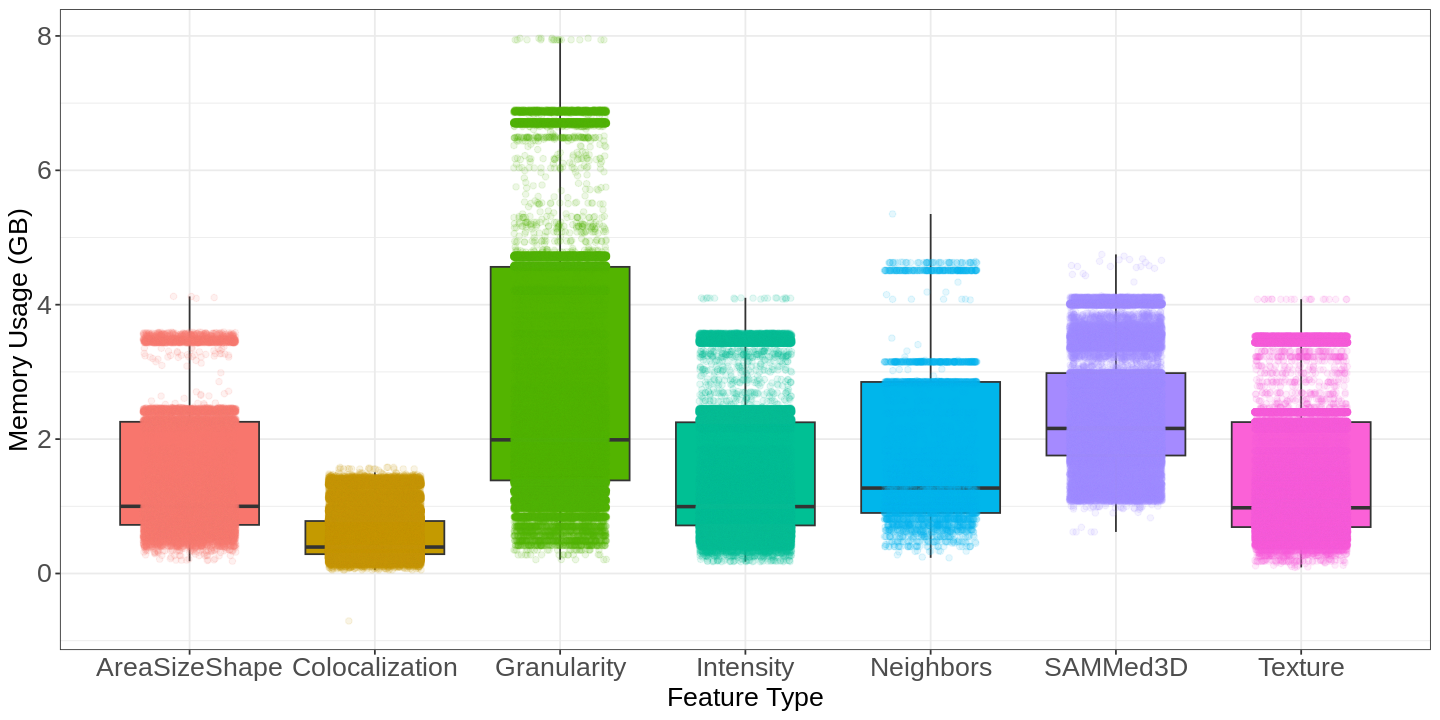

In [5]:
# plot the memory usage for each sub-image set
# where a sub-image set is a channel-compartment-image-set combination
mem_plot <- (
    ggplot(
        profiling_stats_df,
        aes(
            x = feature_type,
            y = mem_usage_GB,
            fill = feature_type
        )
    )
    + geom_boxplot(outlier.shape = NA)
    + geom_jitter(
        aes(color = feature_type),
        position = position_jitterdodge(dodge.width = 0.9, jitter.width = 0.5),
        alpha = 0.1
    )
    + theme_bw()
    + theme(
        axis.text.x = element_text(size = 16),
        axis.text.y = element_text(size = 16),
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16),
        legend.position = "none",
    )
    + labs(
        x = "Feature Type",
        y = "Memory Usage (GB)",
    )
)
ggsave(
    filename = file.path(figures_path, "profiling_memory_per_feature_type.png"),
    plot = mem_plot,
    width = width,
    height = height,
    dpi = 300
)
mem_plot